In [6]:
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
import requests
url = "https://www.opindia.com/latest-news/?nocache"
response = requests.get(url)
response

<Response [200]>

b'<!doctype html >\n<html lang="en-GB">\n<head>\n<meta charset="UTF-8" />\n<title>Today&#039;s Latest English News Reports from India | Archives of OpIndia</title>\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="pingback" href="https://www.opindia.com/xmlrpc.php" />\n<meta name="robots" content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" />\n<link rel="canonical" href="https://www.opindia.com/latest-news/?nocache" /><link rel="next" href="https://www.opindia.com/latest-news/page/2/?nocache" /><link rel="icon" type="image/png" href="https://www.opindia.com/wp-content/uploads/2018/10/opindia-logo-300x300.png">\n\n<meta name="description" content="Latest Breaking News and Opinions from OpIndia.com. List of all news reports and opinions published by OpIndia in a chronological order." />\n<meta property="og:locale" content="en_GB" />\n<meta property="og:type" content="article" />\n<meta property="og:title" content="Today
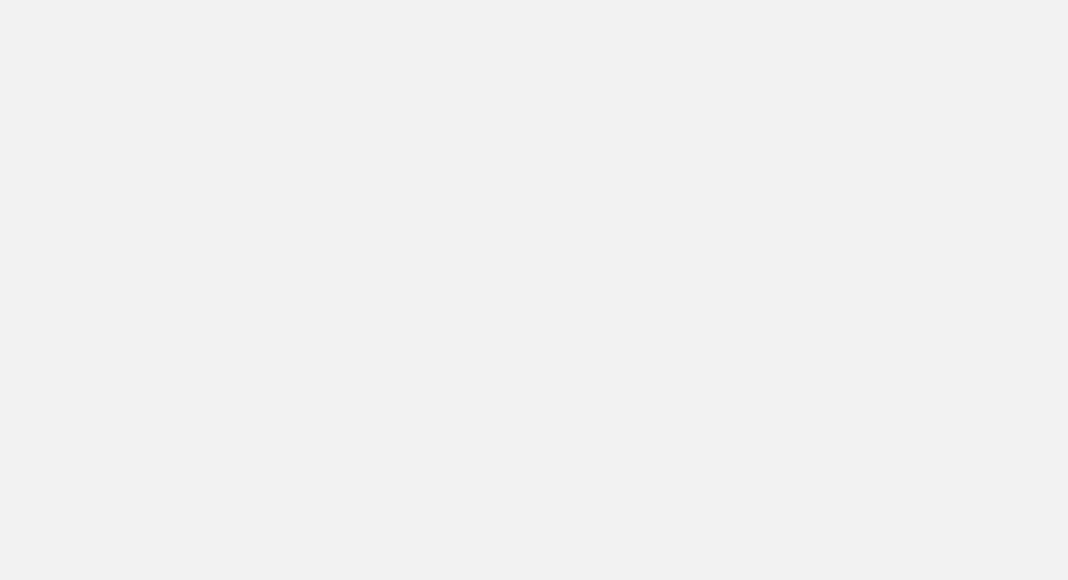

In [8]:
response.content

In [ ]:
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<!DOCTYPE html>
<html lang="en-GB">
<head>
<meta charset="utf-8"/>
<title>Today's Latest English News Reports from India | Archives of OpIndia</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://www.opindia.com/xmlrpc.php" rel="pingback"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots"/>
<link href="https://www.opindia.com/latest-news/?nocache" rel="canonical"/><link href="https://www.opindia.com/latest-news/page/2/?nocache" rel="next"/><link href="https://www.opindia.com/wp-content/uploads/2018/10/opindia-logo-300x300.png" rel="icon" type="image/png"/>
<meta content="Latest Breaking News and Opinions from OpIndia.com. List of all news reports and opinions published by OpIndia in a chronological order." name="description"/>
<meta content="en_GB" property="og:locale"/>
<meta content="article" property="og:type"/>
<meta content="Today's Latest English News Reports from India | Arch
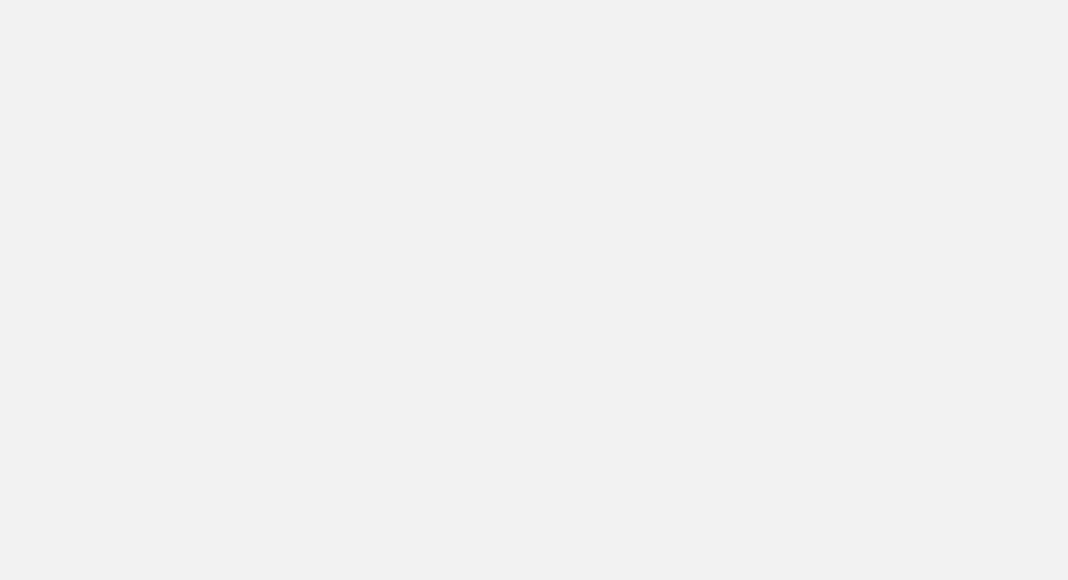

In [9]:
from bs4 import BeautifulSoup
bs = BeautifulSoup(response.content)
bs

In [10]:
headings = bs.find_all('h3',class_='entry-title td-module-title')
headings[0]

<h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2024/01/caa-will-be-implemented-across-india-within-7-days-union-minister-shantanu-thakur-bengal/" rel="bookmark" title="‘CAA will be implemented across India within 7 days’: Union Minister Shantanu Thakur makes bold ‘guarantee’ in Bengal">‘CAA will be implemented across India within 7 days’: Union Minister Shantanu Thakur makes bold ‘guarantee’ in Bengal</a></h3>

In [11]:
headings[0].text

'‘CAA will be implemented across India within 7 days’: Union Minister Shantanu Thakur makes bold ‘guarantee’ in Bengal'

In [12]:
headings[0].find('a').get('href')

'https://www.opindia.com/2024/01/caa-will-be-implemented-across-india-within-7-days-union-minister-shantanu-thakur-bengal/'

#### Web scraping to extract headlines and urls

In [13]:
def get_headings_url(url):
    response = requests.get(url)
    bs = BeautifulSoup(response.content)
    headings = bs.find_all('h3',class_='entry-title td-module-title')
    news_headings = []
    links = []
    for i in headings:
        news_headings.append(i.text)
        links.append(i.find('a').get('href'))
    return news_headings,links


In [14]:
healines,links =get_headings_url(url)
healines

['‘CAA will be implemented across India within 7 days’: Union Minister Shantanu Thakur makes bold ‘guarantee’ in Bengal',
 'Bihar NDA government moves No-confidence motion against Assembly Speaker Awadh Bihari Chaudhary as a first blow to RJD after Nitish switched camps',
 'Punjab: Pro-Khalistanis attack retired Army officer after he removed Bhindranwale’s portrait from Gurdwara',
 'Maharashtra: Union Minister Narayan Rane says Maratha reservation announcement by CM Shinde is problematic, may upset backward caste communities',
 'Karnataka: CM Siddaramaiah justifies pulling down Hanuman flag from 108 feet pole in Mandya, says national flag should have been hoisted',
 'SC stays case against Swami Prasad Maurya over insult to Ramcharitmanas, calls UP police ‘touchy’: Where was this wisdom when Nupur Sharma quoted facts',
 'Ayodhya on the day of Ram Lalla Pran Pratishtha: A glimpse into what true Ram Rajya looks like',
 'History of Bihar- Lalu Prasad Yadav used to call Jan Nayak ‘Kapti Tha

In [15]:
date = bs.find('time',class_='entry-date updated td-module-date')
date.text

'30 January, 2024'

### Function to extract news and date form the website

In [16]:
links

['https://www.opindia.com/2024/01/caa-will-be-implemented-across-india-within-7-days-union-minister-shantanu-thakur-bengal/',
 'https://www.opindia.com/2024/01/bihar-nda-government-moves-no-confidence-motion-against-assembly-speaker-awadh-bihari-chaudhary/',
 'https://www.opindia.com/2024/01/punjab-pro-khalistanis-attack-retired-army-officer-after-he-removed-bhindranwales-portrait-from-gurdwara/',
 'https://www.opindia.com/2024/01/union-minister-narayan-rane-maratha-reservation-announcement-cm-shinde-is-problematic-may-upset-backward-caste-communities/',
 'https://www.opindia.com/2024/01/karnataka-cm-siddaramaiah-justifies-police-pulling-down-hanuman-flag-in-mandya/',
 'https://www.opindia.com/2024/01/sc-stays-case-swami-prasad-maurya-ramcharitmanas-up-police-touchy-nupur-sharma-double-standard/',
 'https://www.opindia.com/2024/01/ayodhya-ram-lalla-pran-pratishtha-glimpse-into-what-true-ram-rajya-looks-like/',
 'https://www.opindia.com/2024/01/lalu-yadav-karpoori-thakur-bharat-ratna-gu

In [22]:
def get_news_date_and_article(links):
    date = []
    article2 =[]
    for i in links:
        response2 = requests.get(i)
        bs2 = BeautifulSoup(response2.content)
        dt = bs2.find('time',class_='entry-date updated td-module-date')
        date.append(dt)
        para = bs2.find_all('p')
        n=''
        for j in para:
            n=n+j.text
        article2.append(n)
    return date,article2  


In [29]:
import requests
from bs4 import BeautifulSoup
response2 = requests.get(url)
bs2 = BeautifulSoup(response2.content)
dt = bs2.findAll('time',class_='entry-date updated td-module-date').``
dt


[<time class="entry-date updated td-module-date" datetime="2024-01-30T08:42:11+05:30">30 January, 2024</time>,
 <time class="entry-date updated td-module-date" datetime="2024-01-29T21:59:18+05:30">29 January, 2024</time>,
 <time class="entry-date updated td-module-date" datetime="2024-01-29T20:42:43+05:30">29 January, 2024</time>,
 <time class="entry-date updated td-module-date" datetime="2024-01-29T20:14:46+05:30">29 January, 2024</time>,
 <time class="entry-date updated td-module-date" datetime="2024-01-29T19:45:42+05:30">29 January, 2024</time>,
 <time class="entry-date updated td-module-date" datetime="2024-01-29T19:39:56+05:30">29 January, 2024</time>,
 <time class="entry-date updated td-module-date" datetime="2024-01-29T18:15:18+05:30">29 January, 2024</time>,
 <time class="entry-date updated td-module-date" datetime="2024-01-29T17:45:02+05:30">29 January, 2024</time>,
 <time class="entry-date updated td-module-date" datetime="2024-01-29T17:31:36+05:30">29 January, 2024</time>,
 

In [18]:
links[0:5]

['https://www.opindia.com/2024/01/caa-will-be-implemented-across-india-within-7-days-union-minister-shantanu-thakur-bengal/',
 'https://www.opindia.com/2024/01/bihar-nda-government-moves-no-confidence-motion-against-assembly-speaker-awadh-bihari-chaudhary/',
 'https://www.opindia.com/2024/01/punjab-pro-khalistanis-attack-retired-army-officer-after-he-removed-bhindranwales-portrait-from-gurdwara/',
 'https://www.opindia.com/2024/01/union-minister-narayan-rane-maratha-reservation-announcement-cm-shinde-is-problematic-may-upset-backward-caste-communities/',
 'https://www.opindia.com/2024/01/karnataka-cm-siddaramaiah-justifies-police-pulling-down-hanuman-flag-in-mandya/']

In [19]:
date,news = get_news_date_and_article(links)

In [20]:
date

[<time class="entry-date updated td-module-date" datetime="2024-01-29T13:33:43+05:30">29 January, 2024 </time>,
 <time class="entry-date updated td-module-date" datetime="2024-01-29T12:16:53+05:30">29 January, 2024 </time>,
 <time class="entry-date updated td-module-date" datetime="2024-01-29T10:19:54+05:30">29 January, 2024 </time>,
 <time class="entry-date updated td-module-date" datetime="2024-01-29T09:37:26+05:30">29 January, 2024 </time>,
 <time class="entry-date updated td-module-date" datetime="2024-01-28T20:37:11+05:30">28 January, 2024 </time>,
 <time class="entry-date updated td-module-date" datetime="2024-01-25T18:05:50+05:30">25 January, 2024 </time>,
 <time class="entry-date updated td-module-date" datetime="2024-01-26T10:47:02+05:30">26 January, 2024 </time>,
 <time class="entry-date updated td-module-date" datetime="2024-01-25T08:46:37+05:30">25 January, 2024 </time>,
 <time class="entry-date updated td-module-date" datetime="2024-01-21T18:08:36+05:30">21 January, 2024 <